<a href="https://colab.research.google.com/github/ovazque/ML/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np

N = 100
X = 6 * np.random.rand(N, 1) - 3
y = 0.8 * X**3 + 0.5 * X**2 + X + 2 + np.random.randn(N, 1)

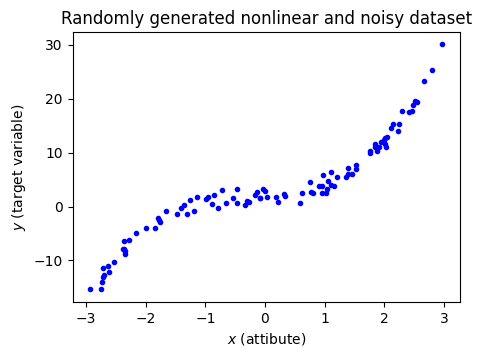

In [86]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,3.5))
plt.title("Randomly generated nonlinear and noisy dataset")
plt.xlabel("$x$ (attibute)")
plt.ylabel("$y$ (target variable)")
plt.plot(X,y,"b.")
plt.show()

The trick when using polynomial regression is to transform the training data by adding the square (for this particular example) for each feature in the training set as a new feature:

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

It can be observed that $X[0,0] = X_{\mathrm{poly}}[0,1]$ and $X_{\mathrm{poly}}[0,2] = X[0,0]^{2}$, i.e., the square of the $x$ attribute. Now $X_{\mathrm{poly}}$ contains the original feature of $X$ plus the square of this feature. Now we can apply the linear regression model to this extended training data.

In [88]:
print("X[0,0] =", X[0,0])
print("X_poly[0,1] = X[0,0] =", X_poly[0,1])
#print("X_poly[0,2] = X[0,0]^2 =", X_poly[0,2])

X[0,0] = 1.9387150707129521
X_poly[0,1] = X[0,0] = 3.758616125409527


In [89]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y )

LinearRegression()

In [90]:
print("Intercept =", lin_reg.intercept_)
print("Coefficients =", lin_reg.coef_)

Intercept = [1.94384808]
Coefficients = [[0.82309846 0.48701009 0.80612259]]


It can be noticed that the model estimates $y = 0.52x^{2} + 1.02x + 1.96$ when in fact the original function is equal to $y = 0.5x^{2} + 1x + 2 + \mathrm{Gaussian \, noise}$.

In [108]:
X_new = np.array([[-2.6],[-2.3],[-2],[-1.3],[-1],[0.5],[0],[0.1],[0.8],[1],[1.3],[1.6],[1.9],[2],[2.5],[3.0]])

In [109]:
X_new_plus_squares = np.c_[X_new, X_new**2, X_new**3]

In [110]:
X_new_plus_squares

array([[-2.6000e+00,  6.7600e+00, -1.7576e+01],
       [-2.3000e+00,  5.2900e+00, -1.2167e+01],
       [-2.0000e+00,  4.0000e+00, -8.0000e+00],
       [-1.3000e+00,  1.6900e+00, -2.1970e+00],
       [-1.0000e+00,  1.0000e+00, -1.0000e+00],
       [ 5.0000e-01,  2.5000e-01,  1.2500e-01],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 1.0000e-01,  1.0000e-02,  1.0000e-03],
       [ 8.0000e-01,  6.4000e-01,  5.1200e-01],
       [ 1.0000e+00,  1.0000e+00,  1.0000e+00],
       [ 1.3000e+00,  1.6900e+00,  2.1970e+00],
       [ 1.6000e+00,  2.5600e+00,  4.0960e+00],
       [ 1.9000e+00,  3.6100e+00,  6.8590e+00],
       [ 2.0000e+00,  4.0000e+00,  8.0000e+00],
       [ 2.5000e+00,  6.2500e+00,  1.5625e+01],
       [ 3.0000e+00,  9.0000e+00,  2.7000e+01]])

In [111]:
y_prediction = lin_reg.predict(X_new_plus_squares)

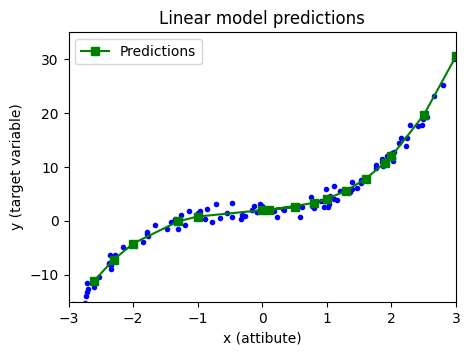

In [112]:
plt.figure(figsize=(5,3.5))
plt.title("Linear model predictions")
plt.xlabel("x (attibute)")
plt.ylabel("y (target variable)")
plt.plot(X, y, "b.")
plt.plot(X_new, y_prediction, marker="s",label='Predictions', color="green")
#plt.plot(X_new, y_true, marker="o",label='True targets', color="red")
plt.axis([-3,3,-15,35])
plt.legend()
plt.show()